# 確率微分方程式と確率積分

現実世界では微分方程式にブラウン運動などの確率的な要素が加わった現象（例えば物体の移動や株価の変動など）がよく出てきます。
ブラウン運動は微分不可能であるため、これは普通の微分方程式と同様に扱ってはいけません。
このような現象は確率微分方程式によって記述され、確率微分方程式の定義には確率積分を先に導入する必要があります。

---

**確率積分**

確率積分はリーマン積分と似た感じで導入されます。まず、次の``単過程``を考えます。

$$
f_t(\omega) = \sum^n_{j=1} e_j(\omega) {\bf 1}_{[t_{j-1}, t_j]}(t)
$$

ここで、$e_j$は$\mathcal{F}_{t_{j-1}}$可測です。
これはつまり、$[a, b]$間で同じ値を取る$n$個の時刻で構築される過程です。
この単過程に対して、伊藤積分は次のように定義されます

$$
\int^b_a f_t dB_t := \sum^n_{j=1} e_j(\omega) (B_{t_j}(\omega) - B_{t_{j-1}}(\omega))
$$

適当な確率過程 $f_t$を積分したい場合、次のような``単過程``で近似してから積分すれば良さそうです。

$$
f_t^{(m)}(\omega) = \sum^m_{j=1} f_{t_{j-1}}(\omega) {\bf 1}_{[t_{j-1}, t_j]}(t)
$$

逆に、適当な$f$は$f^{(m)} \to \infty f$とできるので、$\int^b_a f_t dB_t := \lim_{m\to \infty} \int^b_a f_t^{(m)}dB_t$ と定めます。
これはちゃんとWell-definedになっています（証明は任せます）。

---

これでブラウン運動について積分する操作を定義できました。
このように定義した確率積分を使って、次の伊藤過程が定義されます。

---

**伊藤過程**

* $(v_t)_t$ : 二乗可積分な過程
* $(u_t)_t$ : $\mathcal{F}_t$-適合で一乗可積分

について、
$$
X_t = X_0 + \int_0^t u_s ds + \int^t_0 v_s dB_s
$$
を$(X_t)_{t \in [0, T]}$を伊藤過程と呼ぶ。

---
第一項目は定数項、第二項目は普通のリーマン積分、第三項目が確率積分による項です。
伊藤過程での積分は毎回書くのが面倒くさいので、形式的に

$$
d X_t = u_t dt + v_t dB_t
$$

と書きます。この表記には積分して初めて意味があります。
また、$\mathcal{F_t}$適合な$(f_t)_t$に対して、
$$
\int^t_0 f_s X_s ds= \int_0^t f_s u_s ds + \int^t_0 f_s v_s dB_s
$$

は

$$
f_t d X_t = f_t u_t dt + f_t v_t dB_t
$$

と表記します。

---

**確率微分方程式**

$$
dX_t = b_t(X_t)dt + \sigma_t (X_t) dB_t
$$

を満たす$(X_t)_t$を求める問題を確率微分方程式といいます。

---

確率微分方程式を解くための便利な道具が伊藤の公式です。
特に、伊藤の公式は伊藤過程$(X_t)_{t\in [0, T]}$を関数$\phi(t, x)$によって変数変換したときにどのような確率過程が得られるのかを示してくれます。

---

**伊藤の公式**

$$
\begin{aligned}
d \phi(t, X_t) = 
&\frac{\partial \phi}{\partial t} \phi(t, X_t)dt + \frac{\partial \phi}{\partial x} \phi(t, X_t)dX_t + \frac{1}{2}\frac{\partial^2 \phi}{\partial x^2} (t, X_t) (dX_t)^2\\
&\frac{\partial \phi}{\partial t} \phi(t, X_t)dt + \frac{\partial \phi}{\partial x} \phi(t, X_t)dX_t + \frac{1}{2}\frac{\partial^2 \phi}{\partial x^2} (t, X_t) v_t^2 d_t
\end{aligned}
$$

一項目と二項目は合成関数の微分になります。第三項目の$dt$はブラウン運動の定義より、$(dB_t)^2=dt$によって出てくる項になります。

伊藤の公式を使うと簡単に確率微分方程式を解くことができます。いくつか例題を見てみましょう。

**例題1:** $dX_t = B_t dB_t$

まず元の形 $\int dX_t = \int B_t dB_t$を考えると、なんとなく$X_t = \frac{1}{2} B_t^2$になりそうです。
伊藤の公式の$\phi$は、ブラウン運動を除いた微分方程式の解き方を考えてみるとキレイに設計できます。
とりあえず$\phi(t, x) = \frac{1}{2} x^2$と置いてみます。
すると
* $\frac{\partial \phi}{\partial t} \phi(t, x) = 0$
* $\frac{\partial \phi}{\partial x} \phi(t, x) = x$
* $\frac{\partial^2 \phi}{\partial x^2} \phi(t, x) = 1$

になります。続いて、$\phi(t, B_t)$を考えます。これは伊藤の公式では$X_t = B_t$なので、伊藤の公式より

$$
d\phi(t, B_t) = 0 + B_t dB_t + \frac{1}{2}(d B_t)^2 = dX_t + \frac{1}{2} dt
$$

よって、両辺を積分して、$$\frac{1}{2}B_t^2 = B_0^2 + \int^t_0 dX_s + \frac{1}{2}\int^t_0 dt$$ より、
$$X_t = \frac{1}{2}B_t^2 - \frac{1}{2}t$$

**例題2:** Black-Scholesモデル ($dX_t = \mu X_t d t + \sigma X_t d B_t$)

$\phi(t, X_t) = \ln X_t$を考えるととけます。

$$
X_t = X_0 \exp((\mu - \sigma^2 / 2)t + \sigma B_t)
$$

になります。

---

最後に、Black-Scholesモデルを数値シミュレーションしたものと解析解を比較してみます。数値シミュレーションはEuler-Maruyama法でできます。(https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method)
次のコードは https://qiita.com/karadaharu/items/6c015ec99f30667808f2 を参考にしました。

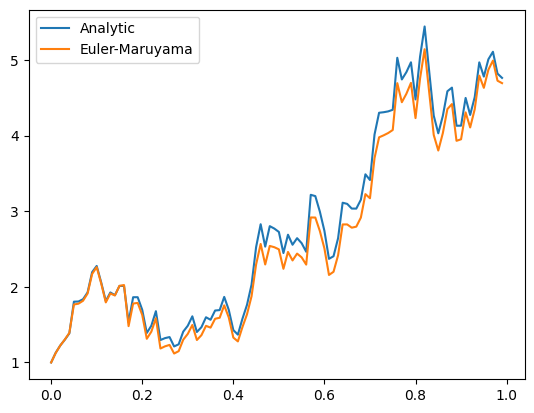

In [6]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 2
mu = 1
Xzero = 1

T = 1.0
N = 10**2
dt = T / N

# 解析解
t = np.arange(0.0, T, dt)
dBt = np.sqrt(dt) *  np.random.randn(N)  # dBtは平均0, 分散dtに従います
dBt[0] = 0
Bt = np.cumsum(dBt)
Xtrue = Xzero * np.exp(  (mu - sigma**2 * 0.5) * t + (sigma*Bt)  )

# Euler-Maruyama
Xem = np.zeros(N)
Xtemp = Xzero
Xem[0] = Xtemp
for j in range(1, N):
    Xtemp = Xtemp + dt * mu * Xtemp + sigma * Xtemp * dBt[j]
    Xem[j] = Xtemp

plt.plot(t, Xtrue, label='Analytic')
plt.plot(t, Xem, label='Euler-Maruyama')
plt.legend()